In [5]:
# Import necessary libraries
import joblib
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Function to read .bin file and convert to flat array of bytes
def read_bin_file(file_path):
    with open(file_path, 'rb') as file:  # Open the file in binary mode
        byte_data = file.read()
        return np.frombuffer(byte_data, dtype=np.uint8)


In [7]:
# Load data
def load_data(folder_path, label):
    data = []
    labels = []
    for file_name in tqdm(os.listdir(folder_path), desc=f"Loading {folder_path}"):
        file_path = os.path.join(folder_path, file_name)
        data.append(read_bin_file(file_path))
        labels.append(label)
    return data, labels

In [8]:

# Paths to folders
folder_paths = ["./datasets/dataset_ready/RPi1Dump", "./datasets/dataset_ready/RPi2Dump", "./datasets/dataset_ready/RPi3Dump"]
labels = [0, 1, 2]

In [9]:
# Read data from all folders
all_data = []
all_labels = []
for folder_path, label in zip(folder_paths, labels):
    data, label = load_data(folder_path, label)
    all_data.extend(data)
    all_labels.extend(label)

Loading ./datasets/dataset_ready/RPi3Dump: 100%|██████████| 602/602 [00:00<00:00, 1795.08it/s]


In [10]:

# Convert to numpy arrays
all_data = np.array(all_data)
all_labels = np.array(all_labels)

In [11]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)


In [12]:
# Further split the training set to create a validation set (20% of training set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [13]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [14]:
# Validate the model
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Precision: {val_precision * 100:.2f}%")
print(f"Validation Recall: {val_recall * 100:.2f}%")
print(f"Validation F1 Score: {val_f1 * 100:.2f}%")

Validation Accuracy: 100.00%
Validation Precision: 100.00%
Validation Recall: 100.00%
Validation F1 Score: 100.00%


In [15]:
# Test the model
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")
print(f"Test F1 Score: {test_f1 * 100:.2f}%")

Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%
Test F1 Score: 100.00%


In [16]:
# Save the trained model to a file
model_filename = 'svm_model.pkl'
joblib.dump(svm_model, model_filename)
print(f"Model saved to {model_filename}")


Model saved to svm_model.pkl


In [17]:
# Visualizations
def plot_metrics(y_true, y_pred, dataset_type):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    metrics = [accuracy, precision, recall, f1]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    plt.figure(figsize=(10, 5))
    plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)
    plt.title(f'{dataset_type} Set Metrics')
    plt.ylabel('Score')
    for i, v in enumerate(metrics):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    plt.show()


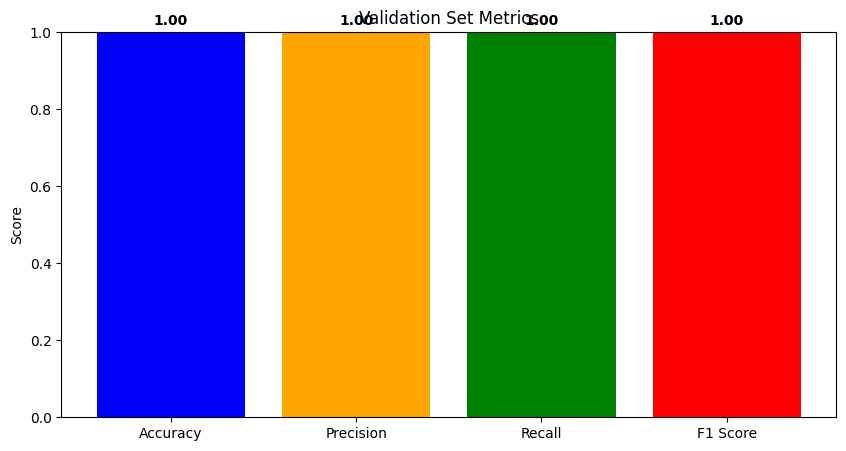

In [18]:
# Plot validation metrics
plot_metrics(y_val, y_val_pred, "Validation")


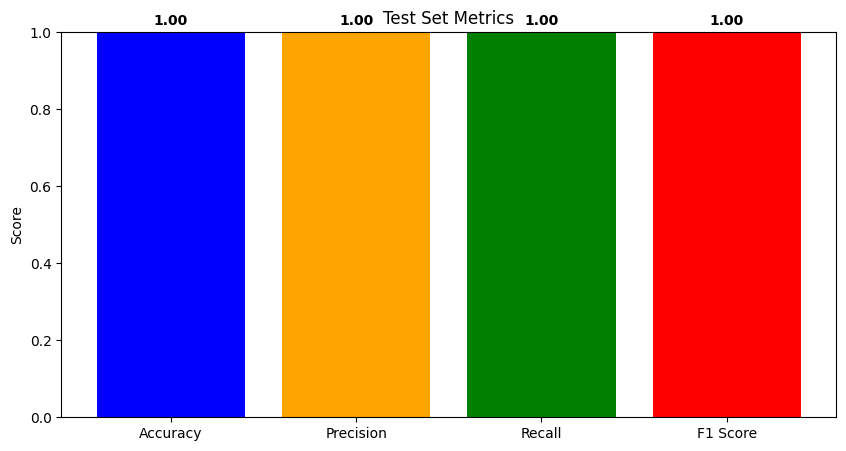

In [19]:
# Plot test metrics
plot_metrics(y_test, y_test_pred, "Test")


In [20]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, dataset_type):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{dataset_type} Set Confusion Matrix')
    plt.show()

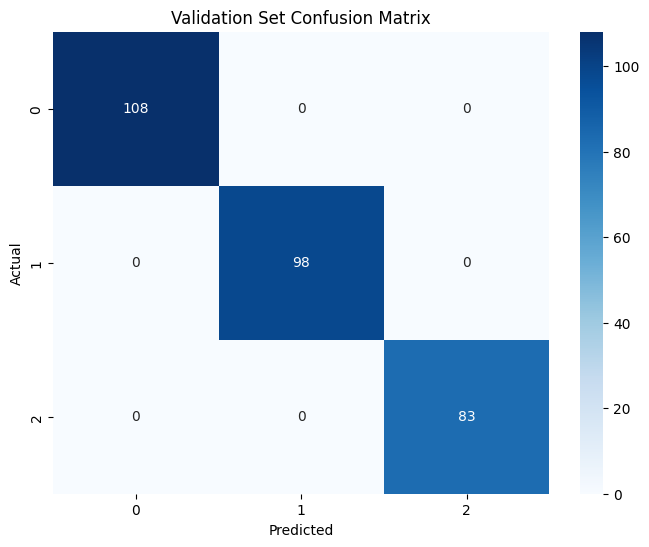

In [21]:
# Plot validation confusion matrix
plot_confusion_matrix(y_val, y_val_pred, "Validation")


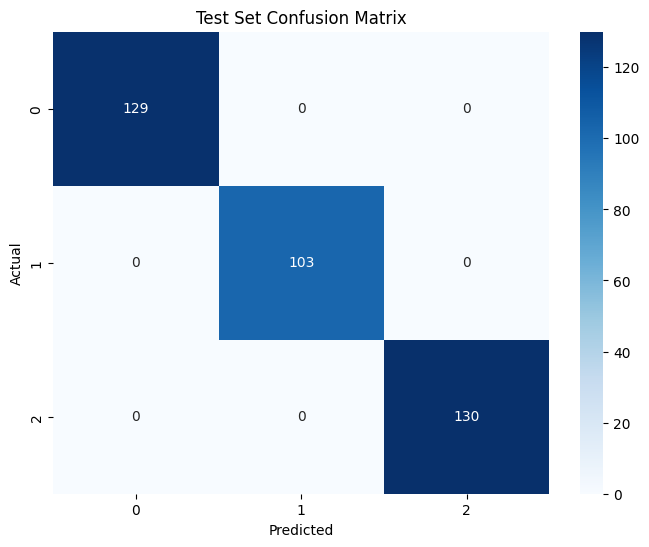

In [22]:
# Plot test confusion matrix
plot_confusion_matrix(y_test, y_test_pred, "Test")